In [1]:
import sys
import pandas as pd
import numpy as np
import datafill as fill
import datatransform as transform

## Load the Original Data


In [2]:
original_df = pd.read_csv("./original dataset/fake_job_postings.csv")
print("Shape:", original_df.shape)
display(original_df.dtypes)
display(original_df.head())

Shape: (17880, 18)


job_id                  int64
title                  object
location               object
department             object
salary_range           object
company_profile        object
description            object
requirements           object
benefits               object
telecommuting           int64
has_company_logo        int64
has_questions           int64
employment_type        object
required_experience    object
required_education     object
industry               object
function               object
fraudulent              int64
dtype: object

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


## Inspect Data


In [3]:
original_df["fraudulent"].value_counts()

fraudulent
0    17014
1      866
Name: count, dtype: int64

In [4]:
# amount of missing data per column
original_df.isna().sum() / len(original_df) * 100

job_id                  0.000000
title                   0.000000
location                1.935123
department             64.580537
salary_range           83.959732
company_profile        18.501119
description             0.005593
requirements           15.078300
benefits               40.335570
telecommuting           0.000000
has_company_logo        0.000000
has_questions           0.000000
employment_type        19.412752
required_experience    39.429530
required_education     45.329978
industry               27.421700
function               36.101790
fraudulent              0.000000
dtype: float64

In [5]:
# Configure display printing & create utilities
pd.set_option("display.max_colwidth", 120)
np.set_printoptions(threshold=sys.maxsize)


def print_na_count(col: pd.Series):
    print(
        "NA count:",
        col.isna().sum(),
        "| Percent total:",
        col.isna().sum() / len(col) * 100,
    )


def print_na_fraudulent_count(df: pd.DataFrame, col: str):
    counts = df[df[col].isna()]["fraudulent"].value_counts()
    print(
        "Fraudulent NA count:",
        counts[1],
        "| Percent total (of NA):",
        counts[1] / counts.sum() * 100,
    )


def print_number_unique(col: pd.Series):
    print("Number unique:", len(col.value_counts()))


def get_unique_values(col: pd.Series):
    return np.sort(col.dropna().unique())



def print_number_fraudulent(df: pd.DataFrame, col: str, value):
    """Print count of fraudulent rows for a unique value in a column."""
    counts = df[[col, "fraudulent"]].value_counts()
    print("Fraudulent unique value count:", counts[value, 1])


def plot_col_fraudulent(df: pd.DataFrame, col: str, n=10):
    """Plot a bar chart of unique counts of a column multi-indexed with "fraudulent" column."""
    counts = df[[col, "fraudulent"]].value_counts().unstack()
    counts.loc[counts.sum(axis=1).sort_values(ascending=False).index[:n]].plot.barh(
        stacked=True
    )

### Title


In [6]:
print_number_unique(original_df["title"])
original_df["title"].value_counts()

Number unique: 11231


title
English Teacher Abroad                                         311
Customer Service Associate                                     146
Graduates: English Teacher Abroad (Conversational)             144
English Teacher Abroad                                          95
Software Engineer                                               86
                                                              ... 
West Coast Regional Channel Manager (RCM)                        1
BI Practice Manager                                              1
Community Coordinator- Ambassador Programme                      1
Senior Traffic Engineer                                          1
Project Cost Control Staff Engineer - Cost Control Exp - TX      1
Name: count, Length: 11231, dtype: int64

### Location


In [7]:
print_na_count(original_df["location"])
print_na_fraudulent_count(original_df, "location")
print_number_unique(original_df["location"])
original_df["location"].value_counts()

NA count: 346 | Percent total: 1.9351230425055927
Fraudulent NA count: 19 | Percent total (of NA): 5.491329479768786
Number unique: 3105


location
GB, LND, London          718
US, NY, New York         658
US, CA, San Francisco    472
GR, I, Athens            464
US, ,                    339
                        ... 
GB, SFK, Leiston           1
GB, LND, Hammersmith       1
US, WA, Seattle            1
BE                         1
GB, WSX, Chichester        1
Name: count, Length: 3105, dtype: int64

In [8]:
get_unique_values(original_df["location"])
# usually country code (US, GB, AU), region/state code (AZ, LND, NSW), &
#   city (Phoenix, London, Sydney) comma separated
# - sometimes region/state is empty
# - sometimes no city
# - sometimes multiple cities appended, comma separated or pipe separated
#   - sometimes state or state code appended to extra cities with or without comma
# - some added details like "See the Requirements section for areas and locations available", "partially in the UK"
# - at least one appears to pass a zip code instead of a city, and another "All"
# - inconsistent spacing and capitalization patterns

array(['AE, , ', 'AE, , Abudhabi', 'AE, , Dubai',
       'AE, , Media City | Dubai', 'AE, AZ, ', 'AE, AZ, Abudhabi',
       'AE, DU, ', 'AE, DU, Dubai', 'AE, DU, Dubai Internet City',
       'AE, DU, Dubayy', 'AL, 11, ', 'AM, , Yerevan', 'AM, ER, Yerevan',
       'AR, , ', 'AT, , ', 'AT, , Salzburg', 'AT, 5, ', 'AT, 5, Salzburg',
       'AT, 9, ', 'AT, 9, Vienna', 'AU', 'AU, , ', 'AU, , Australia',
       'AU, , Australia ', 'AU, , Melbourne', 'AU, , Sydney',
       'AU, , Work from home', 'AU, ACT, ', 'AU, ACT, Canberra',
       'AU, NSW, ', 'AU, NSW, 2010', 'AU, NSW, Albury',
       'AU, NSW, Artarmon', 'AU, NSW, Darlinghurst',
       'AU, NSW, Newcastle ', 'AU, NSW, North Sydney',
       'AU, NSW, South West Sydney and M5 corridor',
       'AU, NSW, Surry Hills', 'AU, NSW, Sydney', 'AU, NSW, Toronto',
       'AU, NSW, sydney', 'AU, NT, ', 'AU, QLD, ', 'AU, QLD, Brisbane',
       'AU, QLD, Gold coast', 'AU, SA, Adelaide', 'AU, TAS, Hobart',
       'AU, TAS, Launceston', 'AU, VIC, ', 

In [9]:
# analyze expansion to country, state, & city; fill to evaluate impact
fill_location_df = original_df.copy()
fill_location_df["location"] = fill_location_df["location"].fillna(
    "undefined, undefined, undefined"
)
expand_location_df = transform.expand_location(fill_location_df)

In [10]:
print_number_unique(expand_location_df["country"])
expand_location_df["country"].value_counts()
# NOTE: no blank value count; all defined locations have a country, unlike state/city

Number unique: 91


country
us    10656
gb     2384
gr      940
ca      457
de      383
      ...  
si        1
co        1
sd        1
ug        1
kh        1
Name: count, Length: 91, dtype: int64

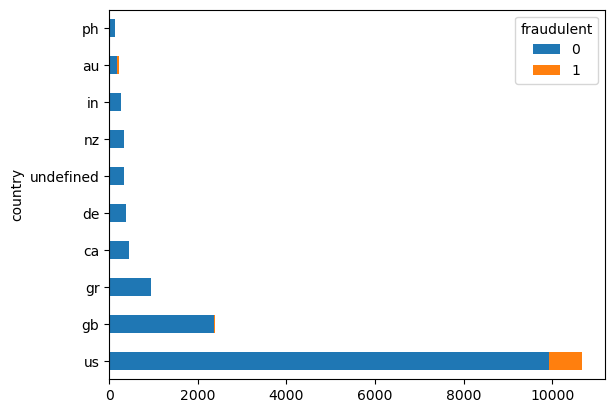

In [11]:
plot_col_fraudulent(expand_location_df, "country")

In [12]:
print_number_unique(expand_location_df["state"])
display(expand_location_df["state"].value_counts())
print("Count of empty state:", expand_location_df["state"].value_counts()[""])

Number unique: 326


state
       2140
ca     2051
ny     1259
lnd     992
tx      975
       ... 
enf       1
d         1
061       1
82        1
nle       1
Name: count, Length: 326, dtype: int64

Count of empty state: 2140


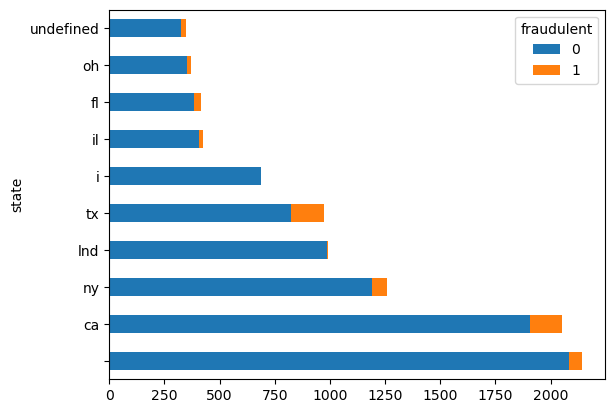

In [13]:
plot_col_fraudulent(expand_location_df, "state")

In [14]:
print_number_unique(expand_location_df["city"])
display(expand_location_df["city"].value_counts())
print("Count of empty city:", expand_location_df["city"].value_counts()[""])

Number unique: 2082


city
                     1628
london               1109
new york              699
athens                559
san francisco         493
                     ... 
ho chi minh             1
perth and kinross       1
ridgewood               1
gaffney                 1
berkeley heights        1
Name: count, Length: 2082, dtype: int64

Count of empty city: 1628


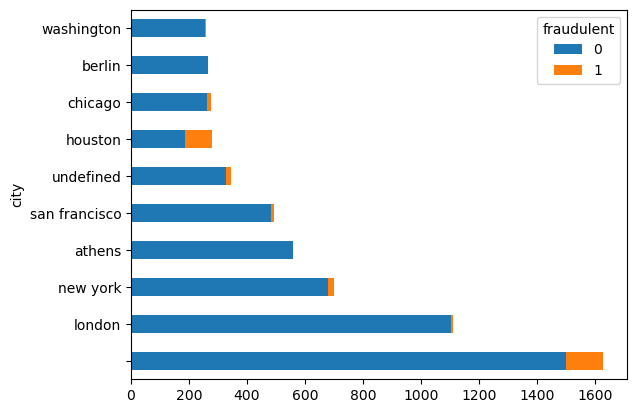

In [15]:
plot_col_fraudulent(expand_location_df, "city")

### Department


In [16]:
print_na_count(original_df["department"])
print_na_fraudulent_count(original_df, "department")
print_number_unique(original_df["department"])
original_df["department"].value_counts()

NA count: 11547 | Percent total: 64.58053691275167
Fraudulent NA count: 531 | Percent total (of NA): 4.5985970381917385
Number unique: 1337


department
Sales                                          551
Engineering                                    487
Marketing                                      401
Operations                                     270
IT                                             225
                                              ... 
Commercial Management / Contract Management      1
Exec                                             1
Marcomm                                          1
CRM                                              1
Hospitality                                      1
Name: count, Length: 1337, dtype: int64

In [17]:
get_unique_values(original_df["department"])
# usually title case
# - several are an acronym
# - sometimes a code, or code and name
# - at least one book-ended with parentheses
# - some refer to locations rather than department
# - one is the literal " "
# - inconsistent spacing and capitalization

array([' ', ' \tCorporate Shared Services', ' Lower Level Management',
       ' Marketing ', ' Moni Technologies', ' R&D', '(Consultant)',
       '.NET', '.net Development', '0', '1221',
       '130 - Nutritional Yeast Packaging', '1411', '20', '20131101',
       '30517', '3D Art', '4', '49', '5',
       '6 locations in the United States, 3 in Canada and 1 in UK',
       '640 Labs', '@ ecgstudio | process improvement specialists',
       'A Techstars Company', 'ACCOUNTING ', 'ACCT', 'ACES', 'ACT',
       'ADMIN', 'ADS', 'AFS12', 'AFS13', 'AFS14', 'AFS16', 'AFS18',
       'AFSAU', 'AFSCC', 'AFSDT', 'AFSDTV', 'AFSHAR', 'AFSHO', 'AFSHON',
       'AFSHOT', 'AFSMCA', 'AFSSA', 'AGENCY CONFIDENTIAL', 'ALM Practice',
       'AMG', 'AMHS', 'AML', 'ANDROIDPIT', 'APP MEDIA', 'AR',
       'AX 20140308/09 (2)', 'Aberdeen ', 'Academic', 'Account',
       'Account Handling', 'Account Management', 'Account team',
       'Account/finance', 'Accountant', 'Accounting',
       'Accounting & Finance', 'Acc

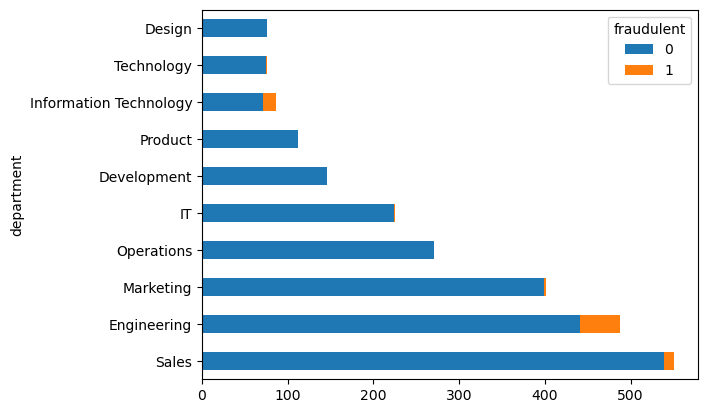

In [18]:
plot_col_fraudulent(original_df, "department")

### Salary Range


In [19]:
print_na_count(original_df["salary_range"])
print_na_fraudulent_count(original_df, "salary_range")
print_number_unique(original_df["salary_range"])
original_df["salary_range"].value_counts()

NA count: 15012 | Percent total: 83.95973154362416
Fraudulent NA count: 643 | Percent total (of NA): 4.283240074606981
Number unique: 874


salary_range
0-0            142
40000-50000     66
30000-40000     55
25000-30000     37
45000-67000     37
              ... 
15-25            1
60-75            1
27500-36000      1
20-22            1
3700-3800        1
Name: count, Length: 874, dtype: int64

In [20]:
get_unique_values(original_df["salary_range"])
# usually positive numbers separated by hyphen
# - some are a day-month or month-day rather than numbers
# TODO some are 20 and below, want to inspect those job listings to interpret unit context

array(['0-0', '0-1', '0-1000', '0-100000', '0-110406', '0-115',
       '0-120000', '0-1200000', '0-12500', '0-130000', '0-15000',
       '0-150000', '0-16000', '0-180000', '0-2000', '0-20000', '0-24000',
       '0-25000', '0-268', '0-30000', '0-32000', '0-34300', '0-35000',
       '0-38000', '0-43500', '0-45000', '0-48000', '0-50000', '0-60000',
       '0-65000', '0-70000', '0-90000', '0-92000', '0-9360000', '0-95000',
       '10-Nov', '10-Oct', '100-120', '100-150', '100-200', '1000-1000',
       '1000-10000', '1000-1100', '1000-1400', '1000-1500', '1000-2000',
       '1000-20000', '1000-26000', '1000-3000', '1000-4000', '1000-5000',
       '1000-6000', '10000-10000', '10000-100000', '10000-12000',
       '10000-120000', '10000-14000', '10000-15000', '10000-16000',
       '10000-18000', '10000-20000', '10000-22000', '10000-25000',
       '10000-250000', '10000-30000', '100000-110000', '100000-115000',
       '100000-117000', '100000-120000', '100000-125000', '100000-130000',
       '1

In [21]:
# analyze expansion to salary min & max; fill to evaluate impact
fill_salary_df = original_df.copy()
fill_salary_df["salary_range"] = fill_salary_df["salary_range"].fillna("")
expand_salary_df = transform.expand_salary_range(fill_salary_df)

In [22]:
print_number_unique(expand_salary_df["salary_min"])
display(expand_salary_df["salary_min"].value_counts())
print_number_fraudulent(expand_salary_df, "salary_min", -1.0)

Number unique: 242


salary_min
-1.0        15017
 40000.0      195
 0.0          195
 30000.0      181
 50000.0      152
            ...  
 27500.0        1
 27.0           1
 32.0           1
 29120.0        1
 3700.0         1
Name: count, Length: 242, dtype: int64

Fraudulent unique value count: 644


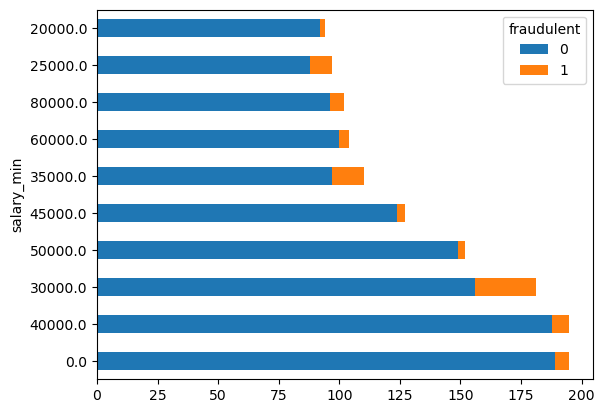

In [23]:
# filter out -1 counts due to significant proportion
plot_col_fraudulent(
    expand_salary_df[expand_salary_df["salary_min"] != -1], "salary_min"
)

In [24]:
print_number_unique(expand_salary_df["salary_max"])
display(expand_salary_df["salary_max"].value_counts())
print_number_fraudulent(expand_salary_df, "salary_max", -1.0)

Number unique: 273


salary_max
-1.0          15034
 50000.0        168
 0.0            142
 100000.0       124
 40000.0        116
              ...  
 53000.0          1
 8582080.0        1
 62400.0          1
 4000000.0        1
 3800.0           1
Name: count, Length: 273, dtype: int64

Fraudulent unique value count: 643


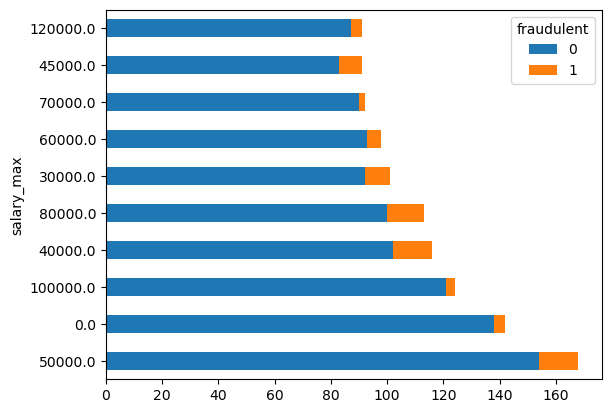

In [25]:
# filter out -1 counts due to significant proportion
plot_col_fraudulent(
    expand_salary_df[expand_salary_df["salary_max"] != -1], "salary_max"
)

### Company Profile


In [26]:
print_na_count(original_df["company_profile"])
print_na_fraudulent_count(original_df, "company_profile")
print_number_unique(original_df["company_profile"])

NA count: 3308 | Percent total: 18.501118568232663
Fraudulent NA count: 587 | Percent total (of NA): 17.744860943168078
Number unique: 1709


In [27]:
original_df["company_profile"].sample(25, random_state=1)
# usually multi-sentence text

5736                                                                                                                         NaN
7106                                                                       We help teachers get safe &amp; secure jobs abroad :)
11978    We are an innovative personnel-sourcing firm with solid team strength in recruiting candidates for various domains i...
9374     MarketInvoice is one of the most high-profile London based fin-tech companies. The Company is Europe’s leading P2P i...
1300                                                                                                                         NaN
703      EUROPEAN DYNAMICS (#URL_c66532ffa1ce76ab447da6774719060c42c584edbf44d74cdb94fc4ac219ca45#) is a leading European Sof...
9361     WillDom is a top notch IT Outsourcing Business Ecosystem, where each member contributes in creating world class valu...
3394     import•io was founded in 2012 by David White (CEO), Andrew Fogg (CDO) and Matt Painter (

### Description


In [28]:
print_na_count(original_df["description"])
print_number_unique(original_df["description"])

NA count: 1 | Percent total: 0.005592841163310962
Number unique: 14801


In [29]:
original_df[original_df["description"].isna()]

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
17513,17514,Office Manager,"PL, MZ, Warsaw",NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,1


In [30]:
original_df["description"].sample(25, random_state=1)
# usually multi-line text

5736     Duration: Full time / W2Location: Piscataway,NJJob description: BA/QA We are looking to hire resources for our Finan...
7106     Play with kids, get paid for it Love travel? Jobs in Asia$1,500+ USD monthly ($200 Cost of living)Housing provided (...
11978    Position : SQL Server Database DeveloperJob Location : Location: Barrington, ILUs work status required : H1B / EAD /...
9374     DescriptionOur mission at MarketInvoice is to modernise the way by which businesses finance their working capital an...
1300     Salary:£9 - £10 per hour We are currently going through an exciting period of change and a new client base, resultin...
703      We currently have a vacancy for a JAVA Developer, fluent in English, to offer his/her services as an expert who will...
9361     We are looking for an iOS Developer, responsible for design, coding, testing and documentation of new features and s...
3394     import•io is on the hunt for a bi-lingual sales executive to join our London based start

### Requirements


In [31]:
print_na_count(original_df["requirements"])
print_na_fraudulent_count(original_df, "requirements")
print_number_unique(original_df["requirements"])

NA count: 2696 | Percent total: 15.078299776286352
Fraudulent NA count: 154 | Percent total (of NA): 5.712166172106825
Number unique: 11967


In [32]:
original_df["requirements"].sample(25, random_state=1)
# usually multi-sentence text

5736     What we require:-- Masters degree in Computers Science/ Information Technology/MBA.-- Candidates willing to relocate...
7106     University degree required. TEFL / TESOL / CELTA or teaching experience preferred but not necessaryCanada/US passpor...
11978    Position : SQL Server Database DeveloperJob Location : Location: Barrington, ILUs work status required : H1B / EAD /...
9374     Duties and ResponsibilitiesReviewing contractual terms and advising on legal risksDrafting deeds, contracts and othe...
1300     Your role will be a varied, interesting and interactive role, and will likely to be approximately 15-20 hours per we...
703      Your skills:Minimum 6 years of relevant University Studies &amp; professional experience in IT;Minimum 2 years of ex...
9361     What you will do:• Works alone or with lead engineer to ensure implementation meets performance and quality standard...
3394     Duties/ResponsibilitiesNegotiating with director level clients in-person and over the ph

### Benefits


In [33]:
print_na_count(original_df["benefits"])
print_na_fraudulent_count(original_df, "benefits")
print_number_unique(original_df["benefits"])

NA count: 7212 | Percent total: 40.33557046979866
Fraudulent NA count: 364 | Percent total (of NA): 5.0471436494731
Number unique: 6204


In [34]:
original_df["benefits"].sample(25, random_state=1)
# usually multi-sentence text

5736                                                                                                                         NaN
7106                                                                                                         See job description
11978                                                                                        Benefits - FullBonus Eligible - Yes
9374     Competitive salaryPrivate HealthcareHalf price gym membership25 days holidayThe opportunity to progress your career ...
1300                                                                                                   Salary:£9 - £10 per hour 
703      Our offer: If you are seeking a career in an exciting and dynamic company, where you will offer your services as par...
9361                                                                                                                         NaN
3394     About Usimport·io is a hugely exciting startup that is shaking up the world of data. Fou

### Employment Type


In [35]:
print_na_count(original_df["employment_type"])
print_na_fraudulent_count(original_df, "employment_type")
print_number_unique(original_df["employment_type"])


original_df["employment_type"].value_counts()

NA count: 3471 | Percent total: 19.41275167785235
Fraudulent NA count: 241 | Percent total (of NA): 6.943244021895707
Number unique: 5


employment_type
Full-time    11620
Contract      1524
Part-time      797
Temporary      241
Other          227
Name: count, dtype: int64

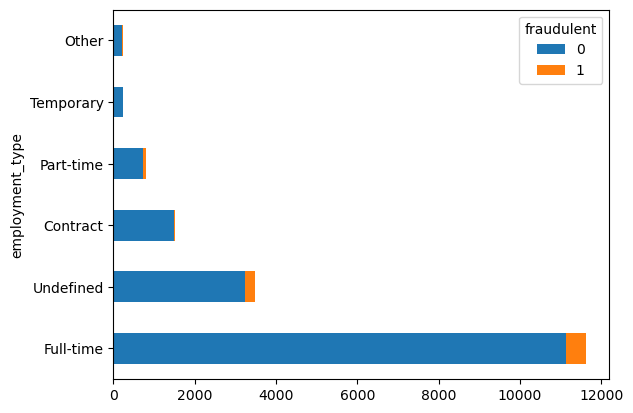

In [36]:
# fill column to evaluate impact
fill_employment_df = original_df.copy()
fill_employment_df["employment_type"] = fill_employment_df["employment_type"].fillna(
    "Undefined"
)
plot_col_fraudulent(fill_employment_df, "employment_type")

### Required Experience


In [37]:
print_na_count(original_df["required_experience"])
print_na_fraudulent_count(original_df, "required_experience")
print_number_unique(original_df["required_experience"])
original_df["required_experience"].value_counts()

NA count: 7050 | Percent total: 39.42953020134228
Fraudulent NA count: 435 | Percent total (of NA): 6.170212765957447
Number unique: 7


required_experience
Mid-Senior level    3809
Entry level         2697
Associate           2297
Not Applicable      1116
Director             389
Internship           381
Executive            141
Name: count, dtype: int64

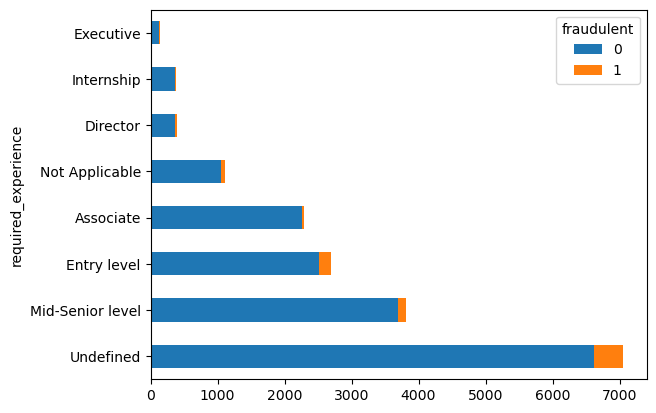

In [38]:
# fill column to evaluate impact
fill_experience_df = original_df.copy()
fill_experience_df["required_experience"] = fill_experience_df[
    "required_experience"
].fillna("Undefined")
plot_col_fraudulent(fill_experience_df, "required_experience")

### Required Education


In [39]:
print_na_count(original_df["required_education"])
print_na_fraudulent_count(original_df, "required_education")
print_number_unique(original_df["required_education"])
original_df["required_education"].value_counts()

NA count: 8105 | Percent total: 45.32997762863535
Fraudulent NA count: 451 | Percent total (of NA): 5.564466378778532
Number unique: 13


required_education
Bachelor's Degree                    5145
High School or equivalent            2080
Unspecified                          1397
Master's Degree                       416
Associate Degree                      274
Certification                         170
Some College Coursework Completed     102
Professional                           74
Vocational                             49
Some High School Coursework            27
Doctorate                              26
Vocational - HS Diploma                 9
Vocational - Degree                     6
Name: count, dtype: int64

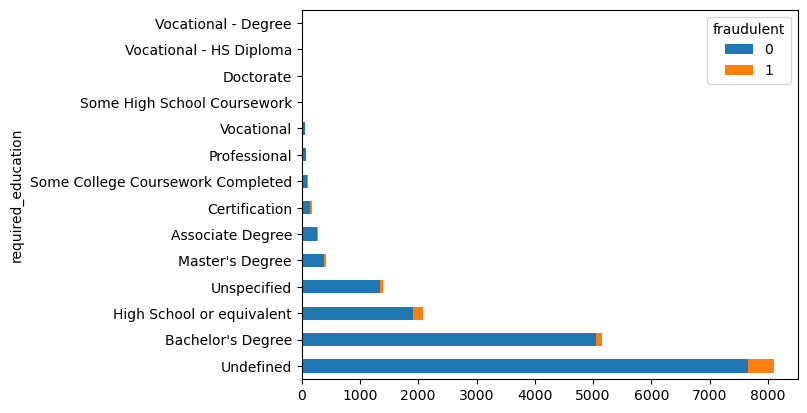

In [40]:
# fill column to evaluate impact
fill_education_df = original_df.copy()
fill_education_df["required_education"] = fill_education_df[
    "required_education"
].fillna("Undefined")
plot_col_fraudulent(fill_education_df, "required_education", n=14)

### Industry


In [41]:
print_na_count(original_df["industry"])
print_na_fraudulent_count(original_df, "industry")
print_number_unique(original_df["industry"])
original_df["industry"].value_counts()

NA count: 4903 | Percent total: 27.421700223713646
Fraudulent NA count: 275 | Percent total (of NA): 5.608810932082398
Number unique: 131


industry
Information Technology and Services    1734
Computer Software                      1376
Internet                               1062
Marketing and Advertising               828
Education Management                    822
                                       ... 
Shipbuilding                              1
Sporting Goods                            1
Museums and Institutions                  1
Wine and Spirits                          1
Ranching                                  1
Name: count, Length: 131, dtype: int64

In [42]:
get_unique_values(original_df["industry"])
# consistent title case

array(['Accounting', 'Airlines/Aviation',
       'Alternative Dispute Resolution', 'Animation', 'Apparel & Fashion',
       'Architecture & Planning', 'Automotive', 'Aviation & Aerospace',
       'Banking', 'Biotechnology', 'Broadcast Media',
       'Building Materials', 'Business Supplies and Equipment',
       'Capital Markets', 'Chemicals', 'Civic & Social Organization',
       'Civil Engineering', 'Commercial Real Estate',
       'Computer & Network Security', 'Computer Games',
       'Computer Hardware', 'Computer Networking', 'Computer Software',
       'Construction', 'Consumer Electronics', 'Consumer Goods',
       'Consumer Services', 'Cosmetics', 'Defense & Space', 'Design',
       'E-Learning', 'Education Management',
       'Electrical/Electronic Manufacturing', 'Entertainment',
       'Environmental Services', 'Events Services', 'Executive Office',
       'Facilities Services', 'Farming', 'Financial Services', 'Fishery',
       'Food & Beverages', 'Food Production', 'Fund-

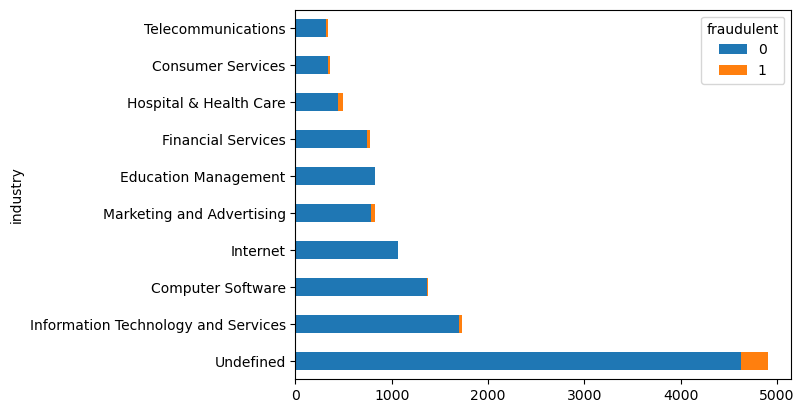

In [43]:
# fill column to evaluate impact
fill_industry_df = original_df.copy()
fill_industry_df["industry"] = fill_industry_df["industry"].fillna("Undefined")
plot_col_fraudulent(fill_industry_df, "industry")

### Function


In [44]:
print_na_count(original_df["function"])
print_na_fraudulent_count(original_df, "function")
print_number_unique(original_df["function"])
original_df["function"].value_counts()

NA count: 6455 | Percent total: 36.10178970917226
Fraudulent NA count: 337 | Percent total (of NA): 5.220759101471727
Number unique: 37


function
Information Technology    1749
Sales                     1468
Engineering               1348
Customer Service          1229
Marketing                  830
Administrative             630
Design                     340
Health Care Provider       338
Other                      325
Education                  325
Management                 317
Business Development       228
Accounting/Auditing        212
Human Resources            205
Project Management         183
Finance                    172
Consulting                 144
Writing/Editing            132
Art/Creative               132
Production                 116
Product Management         114
Quality Assurance          111
Advertising                 90
Business Analyst            84
Data Analyst                82
Public Relations            76
Manufacturing               74
General Business            68
Research                    50
Legal                       47
Strategy/Planning           46
Training                    38

In [45]:
get_unique_values(original_df["function"])
# consistent title case

array(['Accounting/Auditing', 'Administrative', 'Advertising',
       'Art/Creative', 'Business Analyst', 'Business Development',
       'Consulting', 'Customer Service', 'Data Analyst', 'Design',
       'Distribution', 'Education', 'Engineering', 'Finance',
       'Financial Analyst', 'General Business', 'Health Care Provider',
       'Human Resources', 'Information Technology', 'Legal', 'Management',
       'Manufacturing', 'Marketing', 'Other', 'Product Management',
       'Production', 'Project Management', 'Public Relations',
       'Purchasing', 'Quality Assurance', 'Research', 'Sales', 'Science',
       'Strategy/Planning', 'Supply Chain', 'Training', 'Writing/Editing'],
      dtype=object)

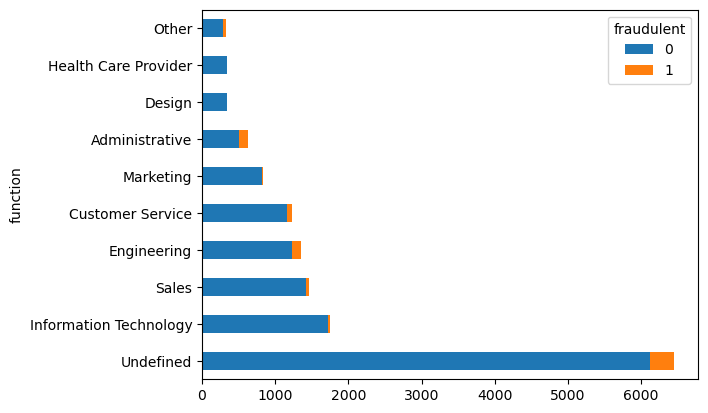

In [46]:
# fill column to evaluate impact
fill_function_df = original_df.copy()
fill_function_df["function"] = fill_function_df["function"].fillna("Undefined")
plot_col_fraudulent(fill_function_df, "function")

## Cleanup, Transform, Export


In [47]:
fill_missing_df = fill.fill_missing(original_df.copy())
transform_df = transform.transform(fill_missing_df)

In [48]:
transform_df.head()

,job_id,title,country,state,city,department,salary_min,salary_max,company_profile,description,...,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,us,ny,new york,Marketing,-1.0,-1.0,"We're Food52, and we've created a groundbreaking and award-winning cooking site. We support, connect, and celebrate ...","Food52, a fast-growing, James Beard Award-winning online food community and crowd-sourced and curated recipe hub, is...",...,,0,1,0,Other,Internship,Undefined,Undefined,Marketing,0
1,2,Customer Service - Cloud Video Production,nz,,auckland,Success,-1.0,-1.0,"90 Seconds, the worlds Cloud Video Production Service.90 Seconds is the worlds Cloud Video Production Service enabli...",Organised - Focused - Vibrant - Awesome!Do you have a passion for customer service? Slick typing skills? Maybe Accou...,...,What you will get from usThrough being part of the 90 Seconds team you will gain:experience working on projects loca...,0,1,0,Full-time,Not Applicable,Undefined,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),us,ia,wever,Undefined,-1.0,-1.0,"Valor Services provides Workforce Solutions that meet the needs of companies across the Private Sector, with a speci...","Our client, located in Houston, is actively seeking an experienced Commissioning Machinery Assistant that possesses ...",...,,0,1,0,NaN,Undefined,Undefined,Undefined,Undefined,0
3,4,Account Executive - Washington DC,us,dc,washington,Sales,-1.0,-1.0,Our passion for improving quality of life through geography is at the heart of everything we do. Esri’s geographic ...,THE COMPANY: ESRI – Environmental Systems Research InstituteOur passion for improving quality of life through geogra...,...,"Our culture is anything but corporate—we have a collaborative, creative environment; phone directories organized by ...",0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,us,fl,fort worth,Undefined,-1.0,-1.0,"SpotSource Solutions LLC is a Global Human Capital Management Consulting firm headquartered in Miami, Florida. Found...","JOB TITLE: Itemization Review ManagerLOCATION: Fort Worth, TX ...",...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [49]:
transform_df.to_csv("./formatted dataset/fake_job_postings.csv")